In [1]:
#import os, sys
#from google.colab import drive
#drive.mount('/content/drive')
#nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
#sys.path.insert(0,nb_path)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 60.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 109.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  roc_curve, auc, roc_auc_score


In [6]:
#pip install --target=$nb_path ktrain

In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/train.csv')

In [9]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"gold settles higher recent downdraft, inflatio...",0.283333,0.116667,Positive
1,1,gloves wedding lace ivory bridalgown weddingdr...,0.600000,0.500000,Positive
2,2,boston happening tomorrow _music!! tickets now...,0.602273,-0.306818,Negative
3,3,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7...",0.000000,0.000000,Neutral
4,4,"gold gains 1 percent dollar retreat, short-cov...",0.000000,0.000000,Neutral


In [10]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/test.csv')

In [11]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,40000,✅awax - finacial blockchain 💰💰💰 innovative wid...,0.666667,0.066667,Positive
1,40001,juuusssttt hair center (say like bob uecker ma...,0.255556,-0.068056,Negative
2,40002,"los videojuegos son vicio caro, asíque os trae...",0.750000,0.375000,Positive
3,40003,cryptocurrency price analysis bitsend bsd : ⬇️...,0.677273,-0.331818,Negative
4,40004,god trust pay cash! deadpresidents cash coin,0.000000,0.000000,Neutral


In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [13]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [14]:
len(X_train), len(X_test)

(40000, 5600)

In [15]:
y_test

['Positive',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positiv

In [16]:
# Building model with transformer
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512)

In [17]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 33
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 34
	99percentile : 34


In [18]:
# getting distilbert model.
model = trans.get_classifier()

In [19]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [20]:
# learner.lr_find(show_plot=True, max_epochs=10)

In [21]:
history = learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
2500/2500 [==============================] - 315s 119ms/step - loss: 0.1376 - accuracy: 0.9528 - val_loss: 0.4616 - val_accuracy: 0.8711
Epoch 2/3
2500/2500 [==============================] - 303s 119ms/step - loss: 0.0322 - accuracy: 0.9922 - val_loss: 0.7606 - val_accuracy: 0.8809
Epoch 3/3
2500/2500 [==============================] - 303s 119ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.6576 - val_accuracy: 0.8805


In [22]:
learner

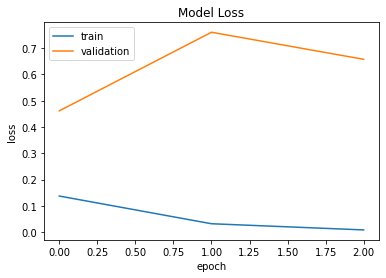

In [23]:
learner.plot('loss')

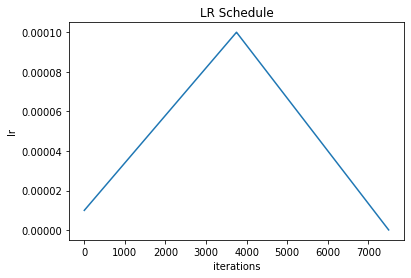

In [24]:
learner.plot('lr')

In [25]:
learner.validate()

175/175 [==============================] - 6s 28ms/step
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       736
           1       0.93      0.85      0.89      2650
           2       0.85      0.96      0.90      2214

    accuracy                           0.88      5600
   macro avg       0.87      0.86      0.86      5600
weighted avg       0.88      0.88      0.88      5600



array([[ 565,   86,   85],
       [ 115, 2242,  293],
       [   6,   84, 2124]])